# Build a simple linear regression model predicting delivery time using sorting time. Performe EDA and do necessary transformations and select the best model

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.formula.api as smf 
import statsmodels.api as sm 
from sklearn.metrics import mean_squared_error 

In [2]:
delivery=pd.read_csv("delivery_time.csv")
delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
delivery.rename(columns = {'Delivery Time':'Delivery', 
                           'Sorting Time':'Sorting'}, inplace = True)

Checking for null values

In [4]:
delivery.isnull().sum(0)

Delivery    0
Sorting     0
dtype: int64

Checking for duplicate entries

In [5]:
delivery.duplicated().sum()

0

Glance at pattern and structure of data

In [6]:
delivery.describe()

,Delivery,Sorting
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


outlier detection

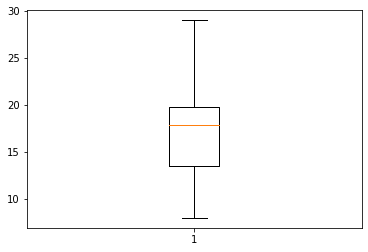

In [7]:
plt.boxplot(delivery["Delivery"])
plt.show()

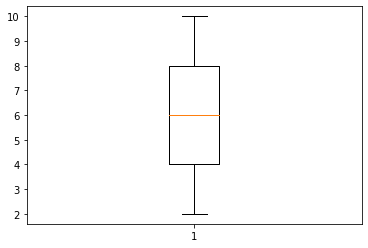

In [8]:
plt.boxplot(delivery["Sorting"])
plt.show()

Checking co relation between input and target variable

In [9]:
delivery.corr()

,Delivery,Sorting
Delivery,1.000000,0.825997
Sorting,0.825997,1.000000


Text(0, 0.5, 'Delivery Time')

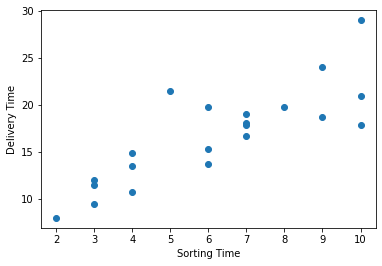

In [10]:
plt.scatter(delivery["Sorting"], delivery["Delivery"])
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")

### Model Building

In [11]:
model = smf.ols("Delivery ~ Sorting", data=delivery).fit()

<AxesSubplot:xlabel='Sorting', ylabel='Delivery'>

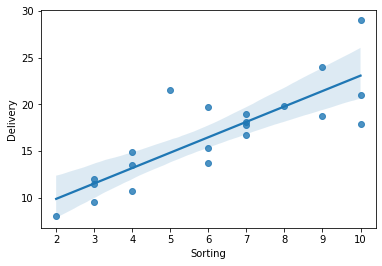

In [12]:
sns.regplot(x="Sorting", y="Delivery", data=delivery)

In [13]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept    3.823349
Sorting      6.387447
dtype: float64 
 Intercept    0.001147
Sorting      0.000004
dtype: float64


H0 = Two variables are indep. ie B1 = 0

H1 = Two variables are dependent. ie B1 != 0


p value (0.000004) < alpha so H1 accepted ie two variables are dependent, B1!=0

In [14]:
model.params

Intercept    6.582734
Sorting      1.649020
dtype: float64

Y(delivery time)=6.58(B0) + 1.65(B1)*X(sorting time) 

In [15]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

But Rsquare value is 0.66 which very low. We will now transform data in order to get better R square value. 

### Transforming Delivery time

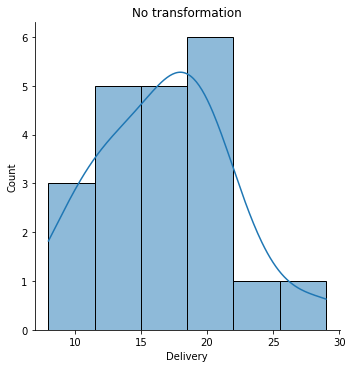

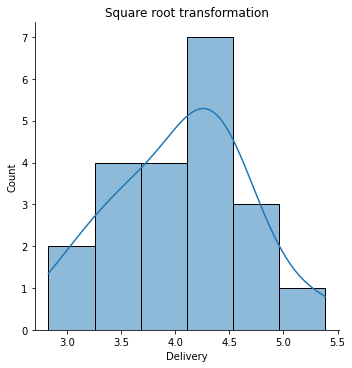

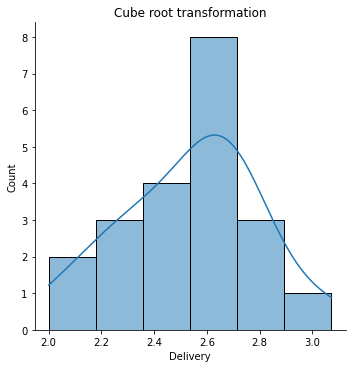

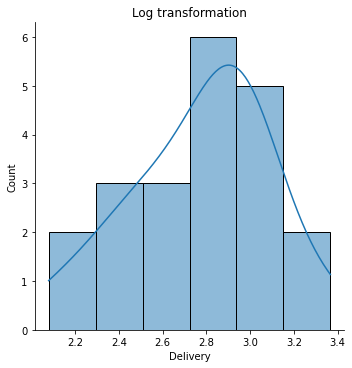

In [16]:
sns.displot(delivery.Delivery, kde=True) 
plt.title('No transformation')

sns.displot(np.sqrt(delivery.Delivery), kde=True)
plt.title('Square root transformation')

sns.displot(np.cbrt(delivery.Delivery), kde=True)
plt.title('Cube root transformation')

sns.displot(np.log(delivery.Delivery), kde=True)
plt.title('Log transformation')


plt.show() 

Text(0.5, 1.0, 'Log transformation')

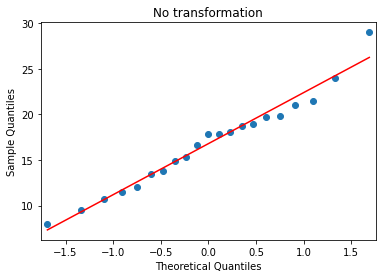

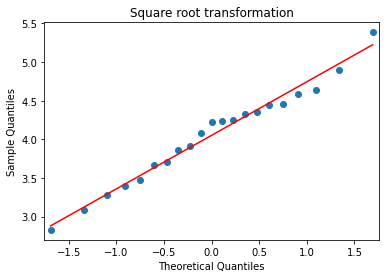

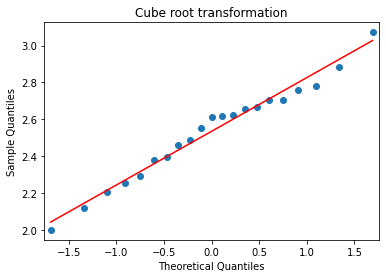

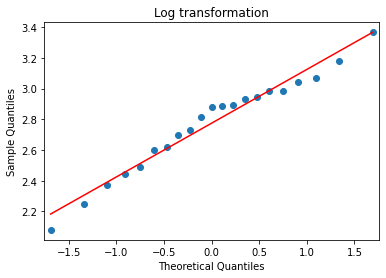

In [17]:
sm.qqplot((delivery.Delivery), line = 'r')
plt.title('No transformation')

sm.qqplot(np.sqrt(delivery.Delivery), line = 'r')
plt.title('Square root transformation')

sm.qqplot(np.cbrt(delivery.Delivery), line = 'r')
plt.title('Cube root transformation')

sm.qqplot(np.log(delivery.Delivery), line = 'r')
plt.title('Log transformation')

### Transforming Sorting Time 

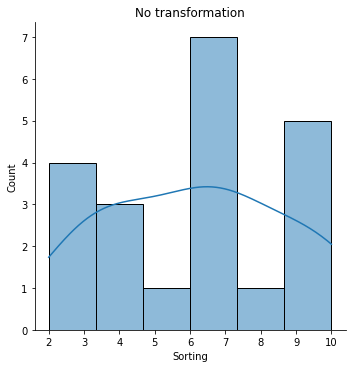

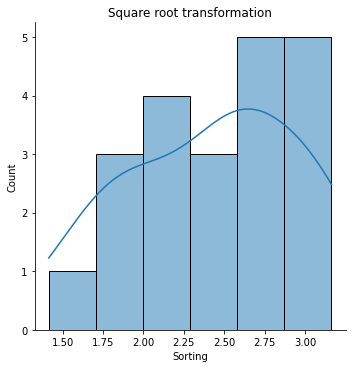

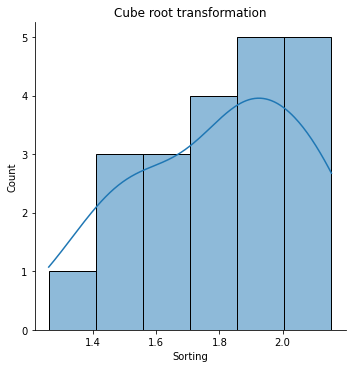

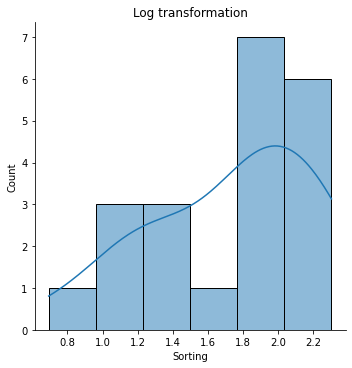

In [18]:
sns.displot(delivery.Sorting, kde=True) 
plt.title('No transformation')

sns.displot(np.sqrt(delivery.Sorting), kde=True)
plt.title('Square root transformation')

sns.displot(np.cbrt(delivery.Sorting), kde=True)
plt.title('Cube root transformation')

sns.displot(np.log(delivery.Sorting), kde=True)
plt.title('Log transformation')


plt.show() 

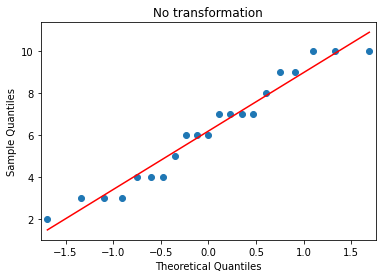

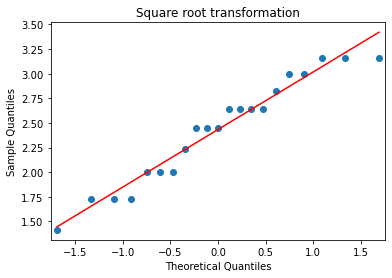

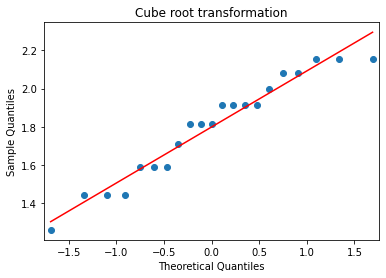

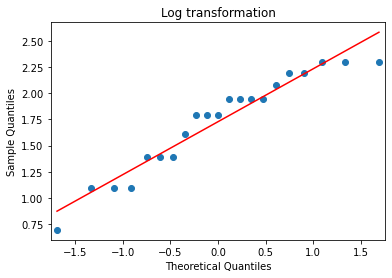

In [19]:
sm.qqplot((delivery.Sorting), line = 'r')
plt.title('No transformation')

sm.qqplot(np.sqrt(delivery.Sorting), line = 'r')
plt.title('Square root transformation')

sm.qqplot(np.cbrt(delivery.Sorting), line = 'r')
plt.title('Cube root transformation')

sm.qqplot(np.log(delivery.Sorting), line = 'r')
plt.title('Log transformation')

plt.show() 

In [20]:
model_sqrt = smf.ols('np.sqrt(Delivery)~np.sqrt(Sorting)' , data=delivery).fit()

In [21]:
(model_sqrt.rsquared, model_sqrt.rsquared_adj) 

(0.7292011987544664, 0.7149486302678594)

Lets Try other cube root transformation to check whether these scores can get any higher than this.

In [22]:
model_cbrt = smf.ols('np.cbrt(Delivery)~np.cbrt(Sorting)' , data=delivery).fit()

In [23]:
(model_cbrt.rsquared, model_cbrt.rsquared_adj) 

(0.7441167577566271, 0.7306492186911864)

Lets Try other log transformation to check whether these scores can get any higher than this.

In [24]:
model_log = smf.ols('np.log(Delivery)~np.log(Sorting)' , data=delivery).fit() 

In [25]:
(model_log.rsquared, model_log.rsquared_adj) 

(0.77216134926874, 0.7601698413355158)

We will now settle for this R square adj value of 0.7601 

In [26]:
model_log.params 

Intercept          1.741987
np.log(Sorting)    0.597522
dtype: float64

Y(Delivery) = exp {B0(1.7419) + B1(0.5975)* log(Sorting)} 

H0 = Two variables are indep. ie B1 = 0

H1 = Two variables are dependent. ie B1 != 0

In [27]:
print(model_log.tvalues , '\n' , model_log.pvalues)

Intercept          13.085552
np.log(Sorting)     8.024484
dtype: float64 
 Intercept          5.921137e-11
np.log(Sorting)    1.601539e-07
dtype: float64


p value (1.601539e-07) < alpha so H1 accepted ie two variables are dependent, B1!=0 

## Residual Analysis  

### Test for Normality of Residuals (Q-Q Plot) 

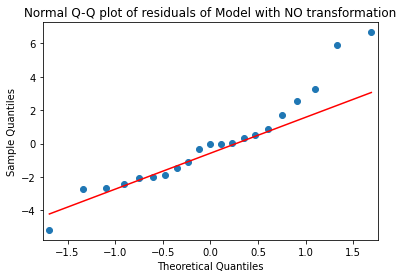

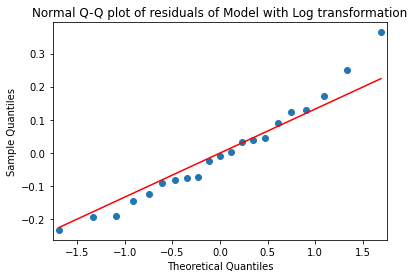

In [28]:
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model with NO transformation')
plt.show()

sm.qqplot(model_log.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model with Log transformation')
plt.show()

Model with log-transformation follows near normal distributon with less skewness than model with no transformation

### Residual Plot to check Homoscedasticity 

In [29]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std() 

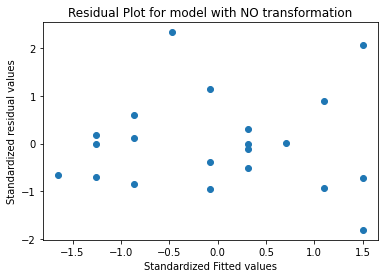

In [30]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot for model with NO transformation')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

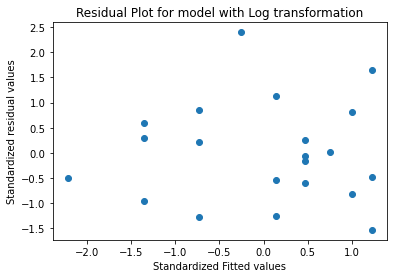

In [31]:
plt.scatter(get_standardized_values(model_log.fittedvalues),
            get_standardized_values(model_log.resid))

plt.title('Residual Plot for model with Log transformation')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

There is no trend or pattern between residual and fitted value

### Some errors are positive, some are negative. Hence mean of errors should be zero 

In [32]:
errors=model_log.resid 
errors.mean() 

1.3745618400120986e-15

# Model Validation 

We will use RMSE as a performance metric in case of linear regression.
First we take SQUARE of distance between predicted values and actual values to get rid of negative numbers, then we take MEAN and then we take ROOT to nullify the effect of squares taken earlier.  

We will have to take square, cube and exponential of values predicted by model_sqrt, model_cbrt and model_log to nullify effect of transformation.

In [33]:
model_rmse=np.sqrt(model.mse_resid)

In [34]:
model_sqrt_pred_y =np.square(model_sqrt.predict(delivery.Sorting))
model_sqrt_rmse =np.sqrt(mean_squared_error(delivery.Delivery, model_sqrt_pred_y))

In [35]:
model_cbrt_pred_y =pow(model_cbrt.predict(delivery.Sorting),3)
model_cbrt_rmse =np.sqrt(mean_squared_error(delivery.Delivery, model_cbrt_pred_y))

In [36]:
model_log_pred_y =np.exp(model_log.predict(delivery.Sorting))
model_log_rmse =np.sqrt(mean_squared_error(delivery.Delivery, model_log_pred_y))

In [37]:
print('model=', model_rmse,'\n' 'model_sqrt=', model_sqrt_rmse,'\n' 'model_cbrt=', model_cbrt_rmse,'\n' 'model_log=', model_log_rmse)

model= 2.9349037688901394 
model_sqrt= 2.7622942793208676 
model_cbrt= 2.7555843098935746 
model_log= 2.7458288976145493


### Model_log has minimum RMSE and highest R square adjusted score. Hence model with log transformation will be our final model 

# Predicting values 

Predicting for train data 

In [38]:
train_data = pd.DataFrame()
train_data['Sorting'] = delivery.Sorting.head(10)
train_data['Delivery'] = delivery.Delivery.head(10) 

In [39]:
train_data['predicted_delivery_normal'] = model.predict(train_data)

In [40]:
train_data['predicted_delivery_log'] = np.exp(model_log.predict(train_data))

In [41]:
train_data  

,Sorting,Delivery,predicted_delivery_normal,predicted_delivery_log
0,10,21.00,23.072933,22.597360
1,4,13.50,13.178814,13.070123
2,6,19.75,16.476853,16.653216
3,9,24.00,21.423913,21.218593
4,10,29.00,23.072933,22.597360
5,6,15.35,16.476853,16.653216
6,7,19.00,18.125873,18.259981
7,3,9.50,11.529794,11.005911
8,10,17.90,23.072933,22.597360
9,9,18.75,21.423913,21.218593


Predict for new data 

In [42]:
newdata=pd.DataFrame([3.5, 6.75],columns=['Sorting'])
newdata['predicted_delivery_normal'] = model.predict(newdata)
newdata['predicted_delivery_log'] =  np.exp(model_log.predict(newdata))

In [43]:
newdata 

,Sorting,predicted_delivery_normal,predicted_delivery_log
0,3.50,12.354304,12.067802
1,6.75,17.713618,17.867463


#                                    Thank You